In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# 2-D DFT: Examples

In [2]:
%pylab inline
import cv2
import scipy.ndimage.interpolation

Populating the interactive namespace from numpy and matplotlib


## Load various images

In [3]:
letterA = cv2.imread('letterA.png', cv2.IMREAD_GRAYSCALE)
letterB = cv2.imread('letterB.png', cv2.IMREAD_GRAYSCALE)
letterE = cv2.imread('letterE.png', cv2.IMREAD_GRAYSCALE)
letterG = cv2.imread('letterG.png', cv2.IMREAD_GRAYSCALE)
letterM = cv2.imread('letterM.png', cv2.IMREAD_GRAYSCALE)
letterS = cv2.imread('letterS.png', cv2.IMREAD_GRAYSCALE)
letterV = cv2.imread('letterV.png', cv2.IMREAD_GRAYSCALE)
letterY = cv2.imread('letterY.png', cv2.IMREAD_GRAYSCALE)

## Compute the 2-D DFT

In [4]:
fftA = np.fft.fftshift(np.fft.fft2(letterA))
fftB = np.fft.fftshift(np.fft.fft2(letterB))
fftE = np.fft.fftshift(np.fft.fft2(letterE))
fftG = np.fft.fftshift(np.fft.fft2(letterG))
fftM = np.fft.fftshift(np.fft.fft2(letterM))
fftS = np.fft.fftshift(np.fft.fft2(letterS))
fftV = np.fft.fftshift(np.fft.fft2(letterV))
fftY = np.fft.fftshift(np.fft.fft2(letterY))

In [5]:
amplitudeA = 20 * np.log(1 + np.abs(fftA))
amplitudeB = 20 * np.log(1 + np.abs(fftB))
amplitudeE = 20 * np.log(1 + np.abs(fftE))
amplitudeG = 20 * np.log(1 + np.abs(fftG))
amplitudeM = 20 * np.log(1 + np.abs(fftM))
amplitudeS = 20 * np.log(1 + np.abs(fftS))
amplitudeV = 20 * np.log(1 + np.abs(fftV))
amplitudeY = 20 * np.log(1 + np.abs(fftY))

## Visualization

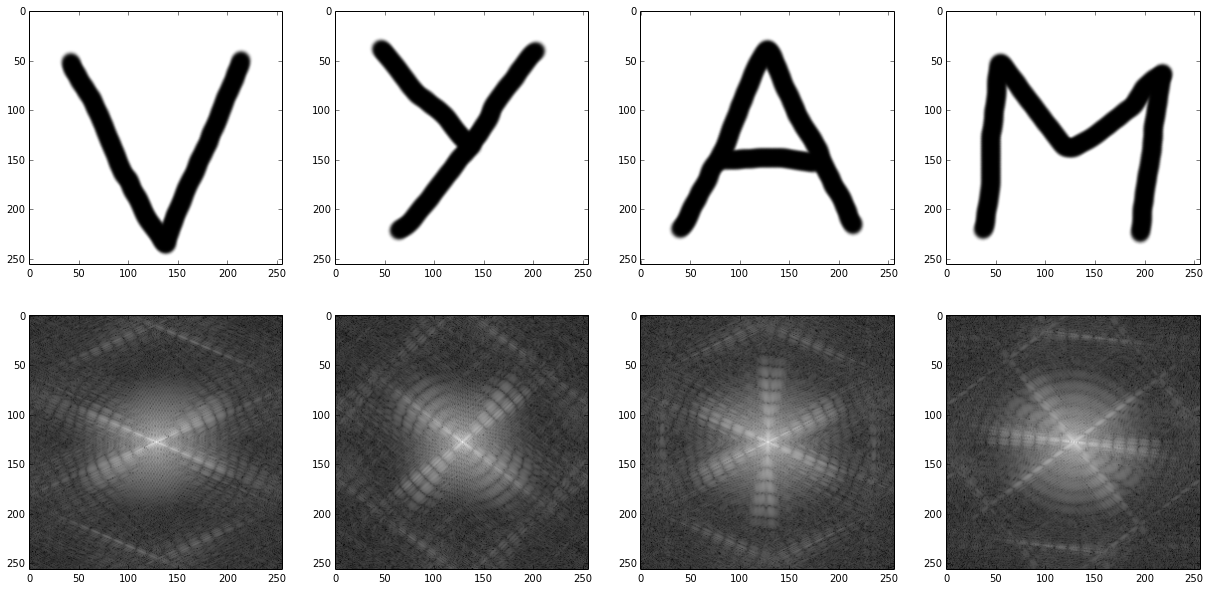

In [6]:
figure(figsize(21,10))
plt.subplot(2,4,1), plt.imshow(letterV, 'gray')
plt.subplot(2,4,2), plt.imshow(letterY, 'gray')
plt.subplot(2,4,3), plt.imshow(letterA, 'gray')
plt.subplot(2,4,4), plt.imshow(letterM, 'gray')
plt.subplot(2,4,5), plt.imshow(amplitudeV, 'gray')
plt.subplot(2,4,6), plt.imshow(amplitudeY, 'gray')
plt.subplot(2,4,7), plt.imshow(amplitudeA, 'gray')
plt.subplot(2,4,8), plt.imshow(amplitudeM, 'gray');

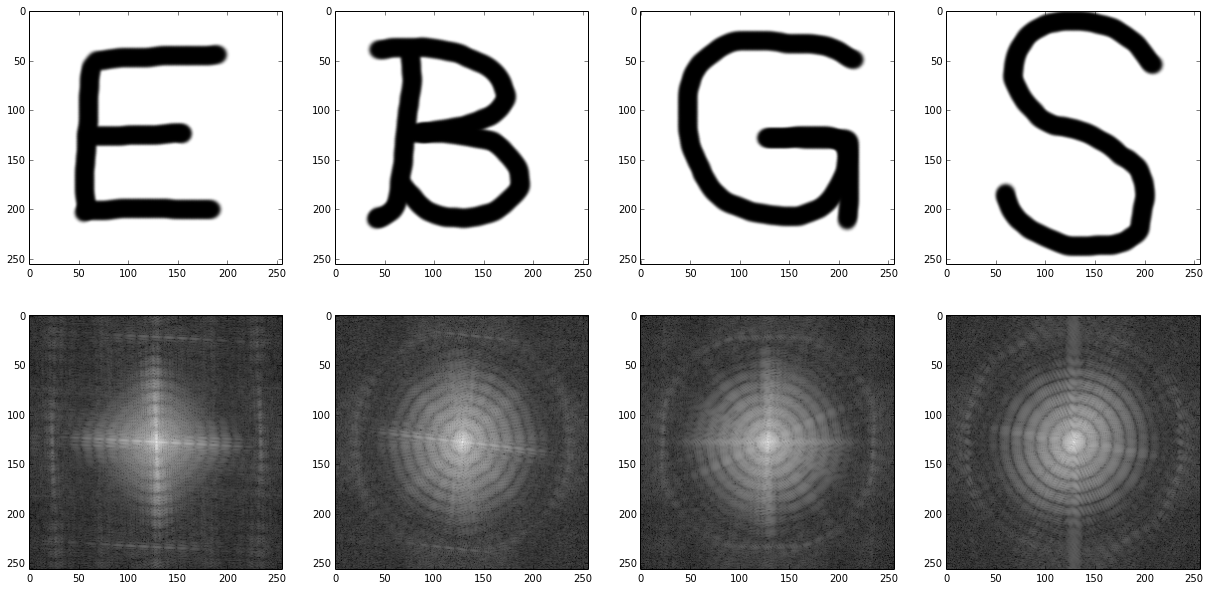

In [7]:
figure(figsize(21,10))
plt.subplot(2,4,1), plt.imshow(letterE, 'gray')
plt.subplot(2,4,2), plt.imshow(letterB, 'gray')
plt.subplot(2,4,3), plt.imshow(letterG, 'gray')
plt.subplot(2,4,4), plt.imshow(letterS, 'gray')
plt.subplot(2,4,5), plt.imshow(amplitudeE, 'gray')
plt.subplot(2,4,6), plt.imshow(amplitudeB, 'gray')
plt.subplot(2,4,7), plt.imshow(amplitudeG, 'gray')
plt.subplot(2,4,8), plt.imshow(amplitudeS, 'gray');

## Rotated images

In [8]:
letterY_rotated = numpy.flipud(numpy.fliplr(letterY)) # rotation by 180°
fftY_rotated = np.fft.fftshift(np.fft.fft2(letterY_rotated))
amplitudeY_rotated = 20 * np.log(1 + np.abs(fftY_rotated))

In [9]:
phaseY = np.angle(fftY)
phaseY_rotated = np.angle(fftY_rotated)

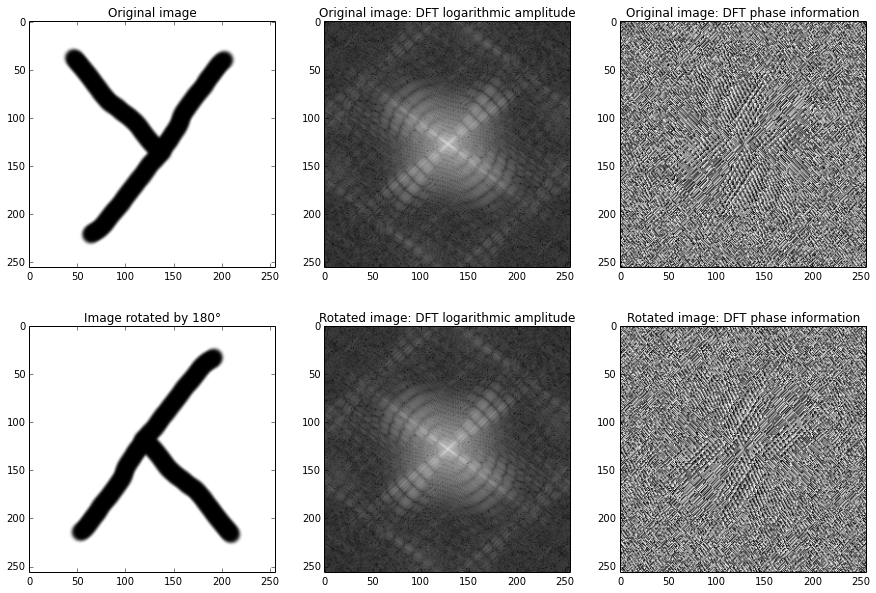

In [10]:
figure(figsize(15,10))
plt.subplot(2,3,1), plt.imshow(letterY, 'gray')
plt.title("Original image")
plt.subplot(2,3,2), plt.imshow(amplitudeY, 'gray')
plt.title("Original image: DFT logarithmic amplitude")
plt.subplot(2,3,3), plt.imshow(phaseY, 'gray')
plt.title("Original image: DFT phase information")
plt.subplot(2,3,4), plt.imshow(letterY_rotated, 'gray')
plt.title(u"Image rotated by 180°")
plt.subplot(2,3,5), plt.imshow(amplitudeY_rotated, 'gray')
plt.title("Rotated image: DFT logarithmic amplitude")
plt.subplot(2,3,6), plt.imshow(phaseY_rotated, 'gray')
plt.title("Rotated image: DFT phase information");

In [11]:
diff_amplitude = amplitudeY - amplitudeY_rotated
diff_phase = phaseY - phaseY_rotated

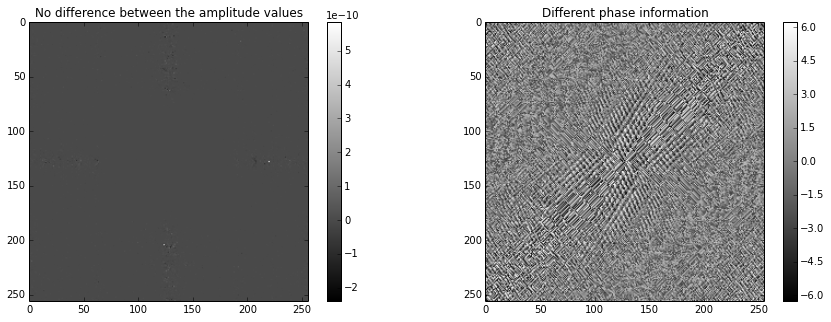

In [12]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(diff_amplitude, 'gray'), plt.colorbar()
plt.title("No difference between the amplitude values")
plt.subplot(1,2,2), plt.imshow(diff_phase, 'gray'), plt.colorbar()
plt.title("Different phase information");